In [2]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import csv
from PIL import Image
from collections import Counter
from robustness.tools.vis_tools import show_image_row
from robustness.tools.label_maps import CLASS_DICT
from robustness import loaders, datasets, model_utils
from robustness.tools.imagenet_helpers import *
from robustness.datasets import DATASETS

sns.set_style('darkgrid')
%matplotlib inline

In [4]:
# INFO_DIR = "/data/theory/robustopt/datasets/imagenet_info/modified"
INFO_DIR = "/home/hasalman/azure-blackbox-smoothing/datasets/imagenet/imagenet_info/modified"
DG = BreedsDatasetGenerator(INFO_DIR)

## Sample datasets

In [5]:
DS_NAME = "NonLiving-9" # "Living-11"/"Dogs-8"/"NonLiving-9"

In [6]:
if DS_NAME == "Living-11":
    # Living things 11 superclasses, 5 subclasses per
    subclass_ranges, label_map, subclass_tuple, _, _ = DG.get_superclasses(level=5, 
                                                                       ancestor="n00004258",
                                                                       Nsubclasses=5, 
                                                                       split=None, 
                                                                       balanced=True, 
                                                                       random_seed=2,
                                                                       verbose=False)

In [7]:
if DS_NAME == "Dogs-8":
    # Dogs, 8 superclasses, 2 subclasses per
    subclass_ranges, label_map, subclass_tuple, _, _ = DG.get_superclasses(level=6, 
                                                                       ancestor="n02084071",
                                                                       Nsubclasses=2, 
                                                                       split=None, 
                                                                       balanced=True, 
                                                                       random_seed=2,
                                                                       verbose=False)

In [8]:
if DS_NAME == "NonLiving-9":

    # Non-living things 11 superclasses, 5 subclasses per
    subclass_ranges, label_map, subclass_tuple, superclasses, _ = DG.get_superclasses(level=4, 
                                                                       ancestor="n00021939",
                                                                       Nsubclasses=12, 
                                                                       split=None, 
                                                                       balanced=True, 
                                                                       random_seed=2,
                                                                       verbose=False)
    skip = [3, 4, 5, 6, 10, 11]
    subclass_ranges = [s for si, s in enumerate(subclass_ranges) if si not in skip]

    label_map_orig = {k: v for k, v in label_map.items()}
    label_map = {}
    count = 0
    for i in range(len(label_map_orig)):
        if i not in skip:
            label_map[count] = label_map_orig[i]
            count += 1

    assert len(subclass_ranges) == len(label_map)

In [9]:
label_map #, superclasses

{0: 'building, edifice',
 1: 'electronic equipment',
 2: 'garment',
 3: 'motor vehicle, automotive vehicle',
 4: 'musical instrument, instrument',
 5: 'sports equipment',
 6: 'vessel, watercraft',
 7: 'vegetable, veggie, veg',
 8: 'fruit'}

## Define dataset and loaders

In [17]:
# IN_dir = "/scratch/engstrom_scratch/imagenet"
IN_dir = "/home/hasalman/azure-blackbox-smoothing/datasets/imagenet/"
IN_dir = "/home/hasalman/azure-blackbox-smoothing/datasets/imagenet_zipped//"
dataset = DATASETS["custom_imagenet"](IN_dir, 
                                     subclass_ranges)
dataset.custom_class = 'Zipped'

In [ ]:
train_loader, val_loader = dataset.make_loaders(10, 100)

==> Preparing dataset custom_imagenet..


In [13]:
_, (im, targ) = next(enumerate(val_loader))

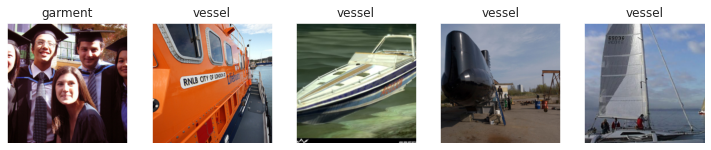

In [14]:
idx = 10
show_image_row([im[idx:idx+5]], 
               tlist=[[label_map[int(t)].split(',')[0] for t in targ[idx:idx+5]]])